In [2]:
import numpy as np
import pandas as pd
import nltk
import re
import string
pd.set_option('display.max_colwidth',100)

In [111]:
stopwords = nltk.corpus.stopwords.words('english')
ps = nltk.PorterStemmer()

In [160]:
data = pd.read_csv('./../SMSSpamCollection.tsv',sep='\t',
                   names=['label','body_text'])

# Cleaning Data

In [113]:
data.head(5)

,label,body_text
0,ham,I've been searching for the right words to thank you for this breather. I promise i wont take yo...
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...
2,ham,"Nah I don't think he goes to usf, he lives around here though"
3,ham,Even my brother is not like to speak with me. They treat me like aids patent.
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!


In [114]:
def cleanUp(textString):
    cleanString = "".join([char.lower() for char in textString if char not in string.punctuation])
    finalOutput = [word for word in re.split('\W+',cleanString) if word not in stopwords]
    return finalOutput


In [161]:
data['cleanedup'] = data['body_text'].apply(lambda x : stemming(cleanUp(x)))

In [162]:
data.head()

,label,body_text,cleanedup
0,ham,I've been searching for the right words to thank you for this breather. I promise i wont take yo...,"[ive, search, right, word, thank, breather, promis, wont, take, help, grant, fulfil, promis, won..."
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,"[free, entri, 2, wkli, comp, win, fa, cup, final, tkt, 21st, may, 2005, text, fa, 87121, receiv,..."
2,ham,"Nah I don't think he goes to usf, he lives around here though","[nah, dont, think, goe, usf, live, around, though]"
3,ham,Even my brother is not like to speak with me. They treat me like aids patent.,"[even, brother, like, speak, treat, like, aid, patent]"
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,"[date, sunday]"


# Stem text

In [117]:
def stemming(stringlist):
    return [ps.stem(word) for word in stringlist]

In [118]:
data['stemmed'] = data['body_text'].apply(lambda x : stemming(cleanUp(x)))

In [119]:
data.head(5)

,label,body_text,cleanedup,stemmed
0,ham,I've been searching for the right words to thank you for this breather. I promise i wont take yo...,"[ive, searching, right, words, thank, breather, promise, wont, take, help, granted, fulfil, prom...","[ive, search, right, word, thank, breather, promis, wont, take, help, grant, fulfil, promis, won..."
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,"[free, entry, 2, wkly, comp, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, 87121, receiv...","[free, entri, 2, wkli, comp, win, fa, cup, final, tkt, 21st, may, 2005, text, fa, 87121, receiv,..."
2,ham,"Nah I don't think he goes to usf, he lives around here though","[nah, dont, think, goes, usf, lives, around, though]","[nah, dont, think, goe, usf, live, around, though]"
3,ham,Even my brother is not like to speak with me. They treat me like aids patent.,"[even, brother, like, speak, treat, like, aids, patent]","[even, brother, like, speak, treat, like, aid, patent]"
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,"[date, sunday]","[date, sunday]"


# Lemmatizing

In [120]:
wn = nltk.WordNetLemmatizer()

In [121]:
def lemmatizing(stringlist):
    return [wn.lemmatize(word) for word in stringlist]

In [122]:
data['lemmatized'] = data['body_text'].apply(lambda x : lemmatizing(cleanUp(x)))

In [123]:
data.head(10)

,label,body_text,cleanedup,stemmed,lemmatized
0,ham,I've been searching for the right words to thank you for this breather. I promise i wont take yo...,"[ive, searching, right, words, thank, breather, promise, wont, take, help, granted, fulfil, prom...","[ive, search, right, word, thank, breather, promis, wont, take, help, grant, fulfil, promis, won...","[ive, searching, right, word, thank, breather, promise, wont, take, help, granted, fulfil, promi..."
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,"[free, entry, 2, wkly, comp, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, 87121, receiv...","[free, entri, 2, wkli, comp, win, fa, cup, final, tkt, 21st, may, 2005, text, fa, 87121, receiv,...","[free, entry, 2, wkly, comp, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, 87121, receiv..."
2,ham,"Nah I don't think he goes to usf, he lives around here though","[nah, dont, think, goes, usf, lives, around, though]","[nah, dont, think, goe, usf, live, around, though]","[nah, dont, think, go, usf, life, around, though]"
3,ham,Even my brother is not like to speak with me. They treat me like aids patent.,"[even, brother, like, speak, treat, like, aids, patent]","[even, brother, like, speak, treat, like, aid, patent]","[even, brother, like, speak, treat, like, aid, patent]"
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,"[date, sunday]","[date, sunday]","[date, sunday]"
5,ham,As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your call...,"[per, request, melle, melle, oru, minnaminunginte, nurungu, vettam, set, callertune, callers, pr...","[per, request, mell, mell, oru, minnaminungint, nurungu, vettam, set, callertun, caller, press, ...","[per, request, melle, melle, oru, minnaminunginte, nurungu, vettam, set, callertune, caller, pre..."
6,spam,WINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To c...,"[winner, valued, network, customer, selected, receivea, 900, prize, reward, claim, call, 0906170...","[winner, valu, network, custom, select, receivea, 900, prize, reward, claim, call, 09061701461, ...","[winner, valued, network, customer, selected, receivea, 900, prize, reward, claim, call, 0906170..."
7,spam,Had your mobile 11 months or more? U R entitled to Update to the latest colour mobiles with came...,"[mobile, 11, months, u, r, entitled, update, latest, colour, mobiles, camera, free, call, mobile...","[mobil, 11, month, u, r, entitl, updat, latest, colour, mobil, camera, free, call, mobil, updat,...","[mobile, 11, month, u, r, entitled, update, latest, colour, mobile, camera, free, call, mobile, ..."
8,ham,"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried ...","[im, gonna, home, soon, dont, want, talk, stuff, anymore, tonight, k, ive, cried, enough, today]","[im, gonna, home, soon, dont, want, talk, stuff, anymor, tonight, k, ive, cri, enough, today]","[im, gonna, home, soon, dont, want, talk, stuff, anymore, tonight, k, ive, cried, enough, today]"
9,spam,"SIX chances to win CASH! From 100 to 20,000 pounds txt> CSH11 and send to 87575. Cost 150p/day, ...","[six, chances, win, cash, 100, 20000, pounds, txt, csh11, send, 87575, cost, 150pday, 6days, 16,...","[six, chanc, win, cash, 100, 20000, pound, txt, csh11, send, 87575, cost, 150pday, 6day, 16, tsa...","[six, chance, win, cash, 100, 20000, pound, txt, csh11, send, 87575, cost, 150pday, 6days, 16, t..."


# Vectorizing

## Count vectorization

In [124]:
from sklearn.feature_extraction.text import CountVectorizer

In [158]:
def clean_stem(stringText):
    return stemming(cleanUp(stringText))

In [140]:
count_vect = CountVectorizer(analyzer=clean_stem)

In [141]:
X_counts = count_vect.fit_transform(data['body_text'])
print(X_counts.shape)
print(count_vect.get_feature_names())

(5568, 8107)
['', '0', '008704050406', '0089mi', '0121', '01223585236', '01223585334', '0125698789', '02', '020603', '0207', '02070836089', '02072069400', '02073162414', '02085076972', '020903', '021', '050703', '0578', '06', '060505', '061104', '07008009200', '07046744435', '07090201529', '07090298926', '07099833605', '071104', '07123456789', '0721072', '07732584351', '07734396839', '07742676969', '07753741225', '0776xxxxxxx', '07786200117', '077xxx', '078', '07801543489', '07808', '07808247860', '07808726822', '07815296484', '07821230901', '0784987', '0789xxxxxxx', '0794674629107880867867', '0796xxxxxx', '07973788240', '07xxxxxxxxx', '0800', '08000407165', '08000776320', '08000839402', '08000930705', '08000938767', '08001950382', '08002888812', '08002986030', '08002986906', '08002988890', '08006344447', '0808', '08081263000', '08081560665', '0825', '0844', '08448350055', '08448714184', '0845', '08450542832', '08452810071', '08452810073', '08452810075over18', '0870', '08700621170150p'

In [142]:
data_sample = data.iloc[1:21]

In [143]:
count_vect_sample = CountVectorizer(analyzer=clean_stem)
X_counts_sample = count_vect_sample.fit_transform(data_sample['body_text'])
print(X_counts_sample.shape)
print(count_vect_sample.get_feature_names())

(20, 192)
['08002986030', '08452810075over18', '09061701461', '1', '100', '100000', '11', '12', '150pday', '16', '2', '20000', '2005', '21st', '3', '4', '4403ldnw1a7rw18', '4txtú120', '6day', '81010', '87077', '87121', '87575', '9', '900', 'aft', 'aid', 'alreadi', 'alright', 'anymor', 'appli', 'ard', 'around', 'b', 'brother', 'call', 'caller', 'callertun', 'camera', 'cash', 'chanc', 'claim', 'click', 'co', 'code', 'colour', 'comin', 'comp', 'copi', 'cost', 'credit', 'cri', 'csh11', 'cup', 'custom', 'da', 'date', 'dont', 'eg', 'eh', 'england', 'enough', 'entitl', 'entri', 'even', 'fa', 'feel', 'ffffffffff', 'final', 'fine', 'finish', 'first', 'free', 'friend', 'go', 'goalsteam', 'goe', 'gonna', 'gota', 'ha', 'hl', 'home', 'hour', 'httpwap', 'im', 'info', 'ive', 'jackpot', 'joke', 'k', 'kim', 'kl341', 'lar', 'latest', 'lccltd', 'like', 'link', 'live', 'lor', 'lunch', 'macedonia', 'make', 'may', 'meet', 'mell', 'membership', 'messag', 'minnaminungint', 'miss', 'mobil', 'month', 'nah', 'na

In [144]:
X_counts_sample

<20x192 sparse matrix of type '<class 'numpy.int64'>'
	with 218 stored elements in Compressed Sparse Row format>

In [145]:
X_counts_df = pd.DataFrame(X_counts_sample.toarray())

In [146]:
X_counts_df

,0,1,2,3,4,5,6,7,8,9,...,182,183,184,185,186,187,188,189,190,191
0,0,1,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,1,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
6,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,1,0,0,0,1,1,...,0,1,0,0,0,0,0,0,0,0
9,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0


In [147]:
X_counts_df.columns = count_vect_sample.get_feature_names()

In [148]:
X_counts_df

,08002986030,08452810075over18,09061701461,1,100,100000,11,12,150pday,16,...,wet,win,winner,wkli,word,wwwdbuknet,xxxmobilemovieclub,xxxmobilemovieclubcomnqjkgighjjgcbl,ye,ü
0,0,1,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,1,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
6,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,1,0,0,0,1,1,...,0,1,0,0,0,0,0,0,0,0
9,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0


## N-Grams

In [149]:
def clean_stem_joined(stringText):
    return " ".join(clean_stem(stringText))

In [152]:
data['cleaned_text'] = data['body_text'].apply(lambda x: clean_stem_joined(x))
data.head(5)

,label,body_text,cleaned_text
0,ham,I've been searching for the right words to thank you for this breather. I promise i wont take yo...,ive search right word thank breather promis wont take help grant fulfil promis wonder bless time
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,free entri 2 wkli comp win fa cup final tkt 21st may 2005 text fa 87121 receiv entri questionstd...
2,ham,"Nah I don't think he goes to usf, he lives around here though",nah dont think goe usf live around though
3,ham,Even my brother is not like to speak with me. They treat me like aids patent.,even brother like speak treat like aid patent
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,date sunday


In [154]:
ngram_vect = CountVectorizer(ngram_range=(2,2))
X_counts_ngram = ngram_vect.fit_transform(data['cleaned_text'])
print(X_counts_ngram.shape)
print(ngram_vect.get_feature_names())

(5568, 31275)
['008704050406 sp', '0089mi last', '0121 2025050', '01223585236 xx', '01223585334 cum', '0125698789 ring', '02 user', '020603 2nd', '0207 153', '02072069400 bx', '02073162414 cost', '02085076972 repli', '020903 2nd', '021 3680', '021 3680offer', '050703 tcsbcm4235wc1n3xx', '06 good', '07046744435 arrang', '07090298926 reschedul', '07099833605 reschedul', '07123456789 87077', '0721072 find', '07732584351 rodger', '07734396839 ibh', '07742676969 show', '07753741225 show', '0776xxxxxxx uve', '077xxx 2000', '07801543489 guarante', '07808 xxxxxx', '07808247860 show', '07808726822 award', '07815296484 show', '0784987 show', '0789xxxxxxx today', '0796xxxxxx today', '07973788240 show', '07xxxxxxxxx 2000', '07xxxxxxxxx show', '0800 0721072', '0800 169', '0800 18', '0800 195', '0800 1956669', '0800 505060', '0800 542', '08000407165 18', '08000776320 repli', '08000839402 2stoptx', '08000839402 2stoptxt', '08000839402 call', '08000839402 call2optout4qf2', '08000839402 call2optoutf4q'

## TF-IDF

In [156]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [346]:
tfidf_vect = TfidfVectorizer(analyzer=clean_stem)
X_tfidf = tfidf_vect.fit_transform(data['body_text'])
print(X_tfidf.shape)
print(tfidf_vect.get_feature_names())

(5568, 8107)
['', '0', '008704050406', '0089mi', '0121', '01223585236', '01223585334', '0125698789', '02', '020603', '0207', '02070836089', '02072069400', '02073162414', '02085076972', '020903', '021', '050703', '0578', '06', '060505', '061104', '07008009200', '07046744435', '07090201529', '07090298926', '07099833605', '071104', '07123456789', '0721072', '07732584351', '07734396839', '07742676969', '07753741225', '0776xxxxxxx', '07786200117', '077xxx', '078', '07801543489', '07808', '07808247860', '07808726822', '07815296484', '07821230901', '0784987', '0789xxxxxxx', '0794674629107880867867', '0796xxxxxx', '07973788240', '07xxxxxxxxx', '0800', '08000407165', '08000776320', '08000839402', '08000930705', '08000938767', '08001950382', '08002888812', '08002986030', '08002986906', '08002988890', '08006344447', '0808', '08081263000', '08081560665', '0825', '0844', '08448350055', '08448714184', '0845', '08450542832', '08452810071', '08452810073', '08452810075over18', '0870', '08700621170150p'

In [166]:
len('fdhjhdh sadf sdafads')

20

In [165]:
len(re.sub('\s','','fdhjhdh sadf sdafads'))

18

## Feature engineering

In [193]:
from scipy import stats
import matplotlib.pyplot as plt

In [228]:
rvs1 = stats.norm.rvs(loc=5,scale=1,size=10000)
rvs2 = stats.norm.rvs(loc=4.85,scale=10,size=1000)

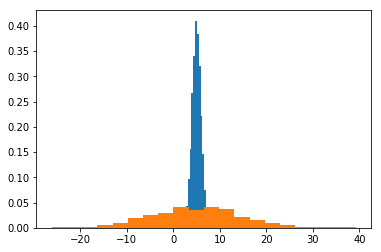

In [229]:
plt.hist(rvs1,20,density=True)
plt.hist(rvs2,20,density=True)
plt.show()

In [232]:
t1, p1 = stats.ttest_ind(rvs1,rvs2)
t2, p2 = stats.ttest_ind(rvs1,rvs2,equal_var=False)

In [233]:
print(p1,p2)

0.1561465849948957 0.6383387866942496


In [236]:
data['body_len'] = data['body_text'].apply(lambda x: len(re.sub('\s','',x)))
data.head()

,label,body_text,cleanedup,body_len
0,ham,I've been searching for the right words to thank you for this breather. I promise i wont take yo...,"[ive, search, right, word, thank, breather, promis, wont, take, help, grant, fulfil, promis, won...",160
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,"[free, entri, 2, wkli, comp, win, fa, cup, final, tkt, 21st, may, 2005, text, fa, 87121, receiv,...",128
2,ham,"Nah I don't think he goes to usf, he lives around here though","[nah, dont, think, goe, usf, live, around, though]",49
3,ham,Even my brother is not like to speak with me. They treat me like aids patent.,"[even, brother, like, speak, treat, like, aid, patent]",62
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,"[date, sunday]",28


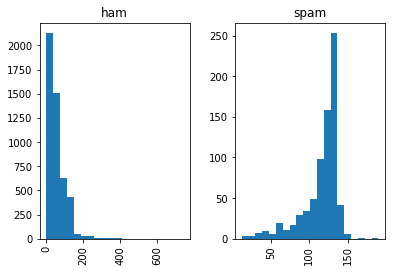

In [248]:
data.hist('body_len',by='label',bins=20)
plt.show()

In [239]:
data['log_len'] = np.log(data['body_len'])

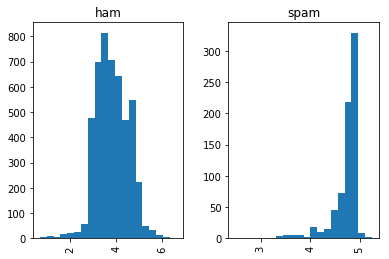

In [247]:
data.hist('log_len',by='label',bins=20)
plt.show()

In [325]:
spam = data[data['label']=='spam']['body_len']
ham = data[data['label']=='ham']['body_len']

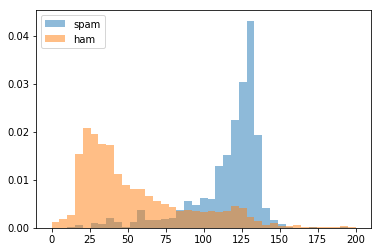

In [326]:
bins = np.linspace(0,200,40)
plt.hist(spam,bins,alpha=0.5,density=True,label='spam')
plt.hist(ham,bins,alpha=0.5,density=True,label='ham')
plt.legend(loc='upper left')
plt.show()

In [335]:
spam = data[data['label']=='spam']['log_len']
ham = data[data['label']=='ham']['log_len']

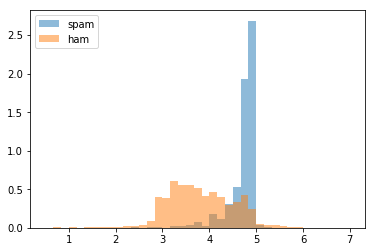

In [339]:
bins = np.linspace(0.5,7,40)
plt.hist(spam,bins,alpha=0.5,density=True,label='spam')
plt.hist(ham,bins,alpha=0.5,density=True,label='ham')
plt.legend(loc='upper left')
plt.show()

It seems the length of these messages really is different between spam and ham.

In [252]:
t, p = stats.ttest_ind(spam, ham, equal_var=False)
print(p)

0.0


In [313]:
def countPunctuation(stringText):
    return round(len([char for char in stringText if char in string.punctuation])/(len(re.sub('\s','',stringText))),3)

In [314]:
data['punc_len'] = data['body_text'].apply(lambda x: countPunctuation(x)*100)

In [333]:
spamPunc = data[data['label']=='spam']['punc_len']
hamPunc = data[data['label']=='ham']['punc_len']

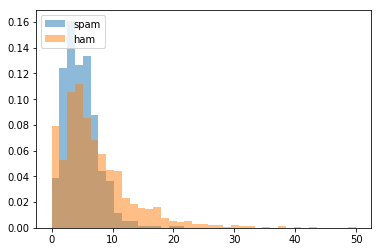

In [327]:
bins = np.linspace(0,50,40)
plt.hist(spamPunc,bins,alpha=0.5,density=True,label='spam')
plt.hist(hamPunc,bins,alpha=0.5,density=True,label='ham')
plt.legend(loc='upper left')
plt.show()

In [329]:
data['log_punc_len'] = np.log(data['punc_len']+0.01)

In [330]:
data.head()

,label,body_text,cleanedup,body_len,log_len,punc_len,log_punc_len
0,ham,I've been searching for the right words to thank you for this breather. I promise i wont take yo...,"[ive, search, right, word, thank, breather, promis, wont, take, help, grant, fulfil, promis, won...",160,5.075174,2.5,0.920283
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,"[free, entri, 2, wkli, comp, win, fa, cup, final, tkt, 21st, may, 2005, text, fa, 87121, receiv,...",128,4.852030,4.7,1.549688
2,ham,"Nah I don't think he goes to usf, he lives around here though","[nah, dont, think, goe, usf, live, around, though]",49,3.891820,4.1,1.413423
3,ham,Even my brother is not like to speak with me. They treat me like aids patent.,"[even, brother, like, speak, treat, like, aid, patent]",62,4.127134,3.2,1.166271
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,"[date, sunday]",28,3.332205,7.1,1.961502


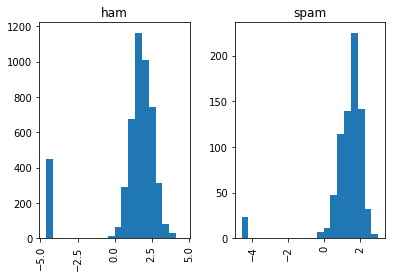

In [331]:
data.hist('log_punc_len',by='label',bins=20)
plt.show()

In [303]:
spamPunc = data[data['label']=='spam']['log_punc_len']
hamPunc = data[data['label']=='ham']['log_punc_len']

The test bellow doesn't seem to be right, I have to use the ztest from stats model for population proportions. Will do that later. Although, at a first glance, by looking at the histogram I think these guys don't seem to be different(first plot without log scale)

In [334]:
t, p = stats.ttest_ind(spamPunc, hamPunc, equal_var=False)
print(p)

2.1296372043377112e-67


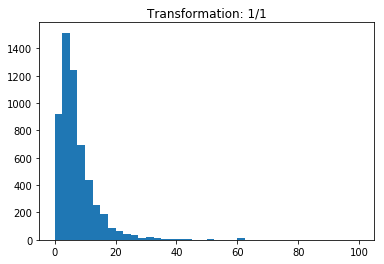

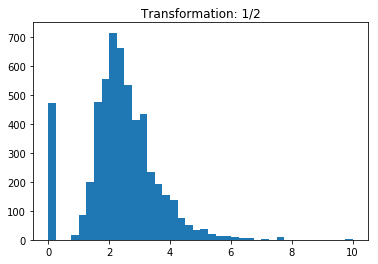

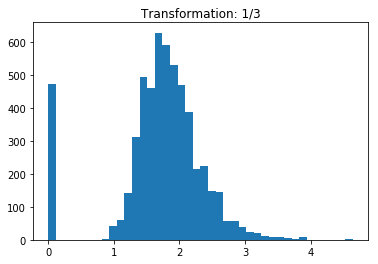

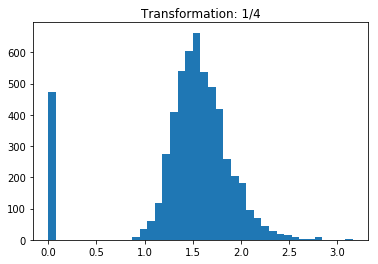

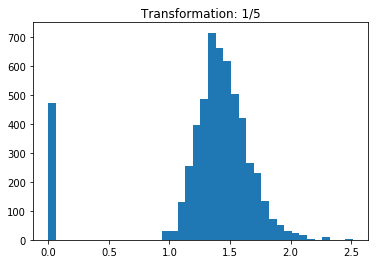

In [342]:
for i in range(1,6):
    plt.hist((data['punc_len'])**(1/i),bins=40)
    plt.title('Transformation: 1/{}'.format(str(i)))
    plt.show()

In [349]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold, cross_val_score

In [347]:
X_features = pd.concat([data['body_len'],data['punc_len']**1/5,pd.DataFrame(X_tfidf.toarray())],axis=1)

In [348]:
X_features.head()

,body_len,punc_len,0,1,2,3,4,5,6,7,...,8097,8098,8099,8100,8101,8102,8103,8104,8105,8106
0,160,0.50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,128,0.94,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,49,0.82,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,62,0.64,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,28,1.42,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [350]:
rf = RandomForestClassifier(n_jobs=-1)
k_fold = KFold(n_splits=5)
cross_val_score(rf, X_features, data['label'], cv=k_fold, scoring='accuracy', n_jobs=-1)

array([0.96588869, 0.97127469, 0.97127469, 0.96316262, 0.96495957])

In [351]:
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.model_selection import train_test_split

In [356]:
X_train, X_test, y_train, y_test = train_test_split(X_features, data['label'], test_size=0.2)

In [361]:
rf2 = RandomForestClassifier(n_estimators=50, max_depth=20, n_jobs=-1)
rf_model = rf2.fit(X_train, y_train)

In [362]:
sorted(zip(rf_model.feature_importances_, X_train.columns), reverse=True)[0:10]

[(0.07570351115356597, 'body_len'),
 (0.06674987251044509, 1804),
 (0.0578217679173648, 7353),
 (0.023749492502942674, 7464),
 (0.02101310432611116, 3135),
 (0.019593583980584684, 6288),
 (0.019482543591534684, 2032),
 (0.015637599925420034, 7030),
 (0.014103429670066692, 397),
 (0.013638406677586661, 2172)]

In [363]:
y_pred = rf_model.predict(X_test)

In [364]:
precision, recall, fscore, support = score(y_test,y_pred, pos_label='spam', average='binary')
print(precision, recall, fscore, support )

1.0 0.5912408759124088 0.743119266055046 None


## Grid search

In [365]:
X_train, X_test, y_train, y_test = train_test_split(X_features, data['label'], test_size=0.2)

In [370]:
def train_RF(n_est, depth):
    rf = RandomForestClassifier(n_estimators=n_est, max_depth=depth, n_jobs=-1)
    rf_model = rf.fit(X_train, y_train)
    y_pred = rf_model.predict(X_test)
    precision, recall, fscore, support = score(y_test, y_pred, pos_label='spam', average='binary')
    print('Est: {} / Depth: {} ---- Precision: {} / Recall: {} / Accuracy: {}'.format(
    n_est, depth, round(precision, 3), round(recall,3), round((y_pred == y_test).sum()/len(y_pred),3)))

In [371]:
for n_est in [10, 50, 100]:
    for depth in [10, 20, 30, None]:
        train_RF(n_est, depth)

Est: 10 / Depth: 10 ---- Precision: 1.0 / Recall: 0.19 / Accuracy: 0.889
Est: 10 / Depth: 20 ---- Precision: 1.0 / Recall: 0.451 / Accuracy: 0.925
Est: 10 / Depth: 30 ---- Precision: 1.0 / Recall: 0.673 / Accuracy: 0.955
Est: 10 / Depth: None ---- Precision: 1.0 / Recall: 0.719 / Accuracy: 0.961
Est: 50 / Depth: 10 ---- Precision: 1.0 / Recall: 0.196 / Accuracy: 0.89
Est: 50 / Depth: 20 ---- Precision: 1.0 / Recall: 0.542 / Accuracy: 0.937
Est: 50 / Depth: 30 ---- Precision: 1.0 / Recall: 0.686 / Accuracy: 0.957
Est: 50 / Depth: None ---- Precision: 1.0 / Recall: 0.791 / Accuracy: 0.971
Est: 100 / Depth: 10 ---- Precision: 1.0 / Recall: 0.216 / Accuracy: 0.892
Est: 100 / Depth: 20 ---- Precision: 1.0 / Recall: 0.523 / Accuracy: 0.934
Est: 100 / Depth: 30 ---- Precision: 1.0 / Recall: 0.647 / Accuracy: 0.952
Est: 100 / Depth: None ---- Precision: 1.0 / Recall: 0.771 / Accuracy: 0.969


In [374]:
X_tfidf_feat = pd.concat([data['body_len'],data['punc_len']**1/5,pd.DataFrame(X_tfidf.toarray())],axis=1)
X_count_feat = pd.concat([data['body_len'],data['punc_len']**1/5,pd.DataFrame(X_counts.toarray())],axis=1)

## Grid Search CV

In [375]:
from sklearn.model_selection import GridSearchCV

In [376]:
rf = RandomForestClassifier()
param = {
    'n_estimators': [10,150,300] ,
    'max_depth': [30,60,90,None]
}
gs = GridSearchCV(rf, param, cv=5, n_jobs=-1)
gs_fit = gs.fit(X_tfidf_feat, data['label'])
pd.DataFrame(gs_fit.cv_results_).sort_values('mean_test_score')